In [ ]:
# -*- coding: utf-8 -*-

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 4


Importation des librairies nécessaires au projet

In [ ]:
import pandas as pad 
import numpy as np
from numpy.core.numeric import NaN

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import functions #fonctions OCR pour les répresentations de l'ACP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics.cluster import adjusted_rand_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pad.read_csv('data_projet4_clean.csv', sep='\t')

In [ ]:
df.set_index('customer_unique_id', inplace=True)

In [ ]:
df

,customer_zip_code_prefix,customer_city,customer_state,payment_type,geolocation_lat,geolocation_lng,review_score_mean,Time_after_last_purchase (days),nb_of_product,moy_achats,Main_prod_category,Tot_achats
customer_unique_id,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,credit_card,-23.340235,-46.830140,5.0,160.273507,1,129.90,home,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,credit_card,-23.559115,-46.787626,4.0,163.263090,1,18.90,health_beauty,27.19
0000f46a3911fa3c0805444483337064,88115,sao jose,SC,credit_card,-27.542880,-48.633426,3.0,585.850868,1,69.00,office,86.22
0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,credit_card,-1.312214,-48.483159,4.0,369.875428,1,25.99,electronics,43.62
0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,credit_card,-23.505548,-47.469705,5.0,336.905972,1,180.00,electronics,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,credit_card,-8.362511,-36.562343,5.0,495.853958,4,1570.00,health_beauty,4134.84
fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,credit_card,-12.217395,-38.959308,4.0,310.890532,1,64.89,health_beauty,84.58
ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,credit_card,-11.834552,-55.508110,5.0,617.070162,1,89.90,auto,112.46


In [ ]:
df = df.rename(columns = {'Time_after_last_purchase (days)': 'Time_after_last_purchase_days'})

# Segmentation des clients par RFM

In [ ]:
df_RFM = df[["Time_after_last_purchase_days", "nb_of_product", "Tot_achats"]]
df_RFM = df_RFM.rename(columns={"Time_after_last_purchase_days": "Recency", "nb_of_product" : "Frequency", "Tot_achats": "Monetary"})

In [ ]:
df_RFM

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19
0000f46a3911fa3c0805444483337064,585.850868,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62
0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495.853958,4,4134.84
fffea47cd6d3cc0a88bd621562a9d061,310.890532,1,84.58
ffff371b4d645b6ecea244b27531430a,617.070162,1,112.46


J'utilise la méthode des quantiles pour classifier les clients comme c'est fait dans le domaine métier

In [ ]:
df_RFM['cluster_Recency'] = np.where(df_RFM['Recency'] >= 1, 1, np.nan)
df_RFM['cluster_Recency'] = np.where(df_RFM['Recency'] >= df_RFM['Recency'].quantile(.25), 2, df_RFM['cluster_Recency'])
df_RFM['cluster_Recency'] = np.where(df_RFM['Recency'] >= df_RFM['Recency'].quantile(.50), 3, df_RFM['cluster_Recency'])
df_RFM['cluster_Recency'] = np.where(df_RFM['Recency'] >= df_RFM['Recency'].quantile(.75), 4, df_RFM['cluster_Recency'])

df_RFM['cluster_Frequency'] = np.where(df_RFM['Frequency'] >= 1, 1, np.nan)
df_RFM['cluster_Frequency'] = np.where(df_RFM['Frequency'] >= df_RFM['Frequency'].quantile(.25), 2, df_RFM['cluster_Frequency'])
df_RFM['cluster_Frequency'] = np.where(df_RFM['Frequency'] >= df_RFM['Frequency'].quantile(.50), 3, df_RFM['cluster_Frequency'])
df_RFM['cluster_Frequency'] = np.where(df_RFM['Frequency'] >= df_RFM['Frequency'].quantile(.75), 4, df_RFM['cluster_Frequency'])

df_RFM['cluster_Monetary'] = np.where(df_RFM['Monetary'] >= 1, 1, np.nan)
df_RFM['cluster_Monetary'] = np.where(df_RFM['Monetary'] >= df_RFM['Monetary'].quantile(.25), 2, df_RFM['cluster_Monetary'])
df_RFM['cluster_Monetary'] = np.where(df_RFM['Monetary'] >= df_RFM['Monetary'].quantile(.50), 3, df_RFM['cluster_Monetary'])
df_RFM['cluster_Monetary'] = np.where(df_RFM['Monetary'] >= df_RFM['Monetary'].quantile(.75), 4, df_RFM['cluster_Monetary'])

In [ ]:
df_RFM.groupby('cluster_Recency')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_Recency,,,,,,,,
1.0,24257.0,105.364670,32.775484,44.349549,75.837431,104.327407,132.940833,162.179132
2.0,24256.0,213.417025,30.162418,162.181713,186.987674,213.372060,238.973238,266.268472
3.0,24257.0,324.900854,35.188863,266.270347,295.773229,324.724502,351.263241,394.266227
4.0,24257.0,499.969756,72.104273,394.268715,439.837627,492.152477,552.250787,772.843738


In [ ]:
df_RFM.groupby('cluster_Frequency')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_Frequency,,,,,,,,
4.0,97027.0,2.358395,25.230154,1.0,1.0,1.0,1.0,4113.0


Ici les clients ne reviennent pas sur le site, utiliser les quartiles pour les classifier reviendrait à tous les classer 4/4, hors c'est bien un mauvais point qu'ils ne viennent pas, je choisis donc de les mettre tous à 1.

In [ ]:
df_RFM['cluster_Frequency'] = 1

In [ ]:
df_RFM.groupby('cluster_Monetary')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_Monetary,,,,,,,,
1.0,24257.0,44.743766,12.311762,9.59,35.100,45.00,55.1300,65.15
2.0,24185.0,88.991427,15.100145,65.17,75.530,87.72,102.0300,116.93
3.0,24323.0,158.547403,27.642293,116.94,134.900,155.63,180.2600,215.30
4.0,24262.0,622.910234,1264.682764,215.31,272.175,371.48,627.6325,109312.64


In [ ]:
df_RFM["Customer_score"] = df_RFM["cluster_Recency"] + df_RFM["cluster_Frequency"] + df_RFM["cluster_Monetary"]

In [ ]:
df_RFM['Customer_score'].describe()

count    97027.000000
mean         6.000794
std          1.568034
min          3.000000
25%          5.000000
50%          6.000000
75%          7.000000
max          9.000000
Name: Customer_score, dtype: float64

In [ ]:
df_RFM

,Recency,Frequency,Monetary,cluster_Recency,cluster_Frequency,cluster_Monetary,Customer_score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,160.273507,1,141.90,1.0,1,3.0,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,163.263090,1,27.19,2.0,1,1.0,4.0
0000f46a3911fa3c0805444483337064,585.850868,1,86.22,4.0,1,2.0,7.0
0000f6ccb0745a6a4b88665a16c9f078,369.875428,1,43.62,3.0,1,1.0,5.0
0004aac84e0df4da2b147fca70cf8255,336.905972,1,196.89,3.0,1,3.0,7.0
...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495.853958,4,4134.84,4.0,1,4.0,9.0
fffea47cd6d3cc0a88bd621562a9d061,310.890532,1,84.58,3.0,1,2.0,6.0
ffff371b4d645b6ecea244b27531430a,617.070162,1,112.46,4.0,1,2.0,7.0


J'applique la segmentation des clients suivant les critères RFM : 

source : https://www.e-marketing.fr/Thematique/academie-1078/fiche-outils-10154/scoring-RFM-306775.htm

In [ ]:
df_RFM['Customer_level'] = np.where(df_RFM['Customer_score'] >= 0, 'Inactif', np.nan)
df_RFM['Customer_level'] = np.where(df_RFM['Customer_score'] >= 4 , 'Client tiède', df_RFM['Customer_level'])
df_RFM['Customer_level'] = np.where(df_RFM['Customer_score'] >= 7, 'Bon client', df_RFM['Customer_level'])
df_RFM['Customer_level'] = np.where(df_RFM['Customer_score'] >= 9, 'Très bon client', df_RFM['Customer_level'])

In [ ]:
df_RFM['Customer_level'].value_counts().index

Index(['Client tiède', 'Bon client', 'Très bon client', 'Inactif'], dtype='object')

In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette)

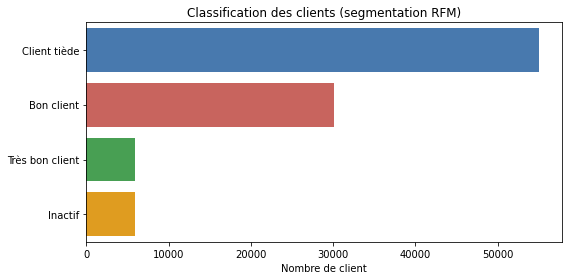

In [ ]:
plt.figure(figsize=(8,4))
plt.title('Classification des clients (segmentation RFM)')
ax = sns.barplot(y = df_RFM['Customer_level'].value_counts().index, x = df_RFM['Customer_level'].value_counts())
plt.xlabel('Nombre de client')
plt.tight_layout()
fig = ax.get_figure()
#fig.savefig("Classification clients RFM", dpi=400)
plt.show()

Je renvoie la classification des clients par RFM dans la dataframe de début pour effectuer d'autres segmentations notamment sur la catégorie de produit préférentielle, la localisation, le mode de paiement...

In [ ]:
df['Customer_level'] = df_RFM['Customer_level']

### Préparation des données

Préparation des données catégorielles

In [ ]:
features_Quant = ['review_score_mean', 'Time_after_last_purchase_days', 'nb_of_product', 'moy_achats','Tot_achats']
features_Qual = ['Main_prod_category', 'Customer_level']

In [ ]:
df = df.drop(['customer_zip_code_prefix', 'customer_city', 'geolocation_lat', 'geolocation_lng'], axis=1)

In [ ]:
df

,customer_state,payment_type,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Main_prod_category,Tot_achats,Customer_level
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,credit_card,5.0,160.273507,1,129.90,home,141.90,Client tiède
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,credit_card,4.0,163.263090,1,18.90,health_beauty,27.19,Client tiède
0000f46a3911fa3c0805444483337064,SC,credit_card,3.0,585.850868,1,69.00,office,86.22,Bon client
0000f6ccb0745a6a4b88665a16c9f078,PA,credit_card,4.0,369.875428,1,25.99,electronics,43.62,Client tiède
0004aac84e0df4da2b147fca70cf8255,SP,credit_card,5.0,336.905972,1,180.00,electronics,196.89,Bon client
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,PE,credit_card,5.0,495.853958,4,1570.00,health_beauty,4134.84,Très bon client
fffea47cd6d3cc0a88bd621562a9d061,BA,credit_card,4.0,310.890532,1,64.89,health_beauty,84.58,Client tiède
ffff371b4d645b6ecea244b27531430a,MT,credit_card,5.0,617.070162,1,89.90,auto,112.46,Bon client


Google colab plante (RAM insuffisante) si je prend l'ensemble du dataset, je vais donc en prendre qu'une partie

In [ ]:
#df_sample = df
df_sample = df.sample(int(df.shape[0]/4), random_state=7).copy()

In [ ]:
df_sample[features_Qual]

,Main_prod_category,Customer_level
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,home,Client tiède
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,Client tiède
0000f46a3911fa3c0805444483337064,office,Bon client
0000f6ccb0745a6a4b88665a16c9f078,electronics,Client tiède
0004aac84e0df4da2b147fca70cf8255,electronics,Bon client
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty,Très bon client
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,Client tiède
ffff371b4d645b6ecea244b27531430a,auto,Bon client


In [ ]:
oneHotEncoder_fit = OneHotEncoder(sparse=False).fit(df_sample[features_Qual])
df_features_Qual = oneHotEncoder_fit.fit_transform(df_sample[features_Qual])

In [ ]:
oneHotEncoder_fit.get_feature_names().tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_appliances',
 'x0_arts',
 'x0_auto',
 'x0_construction',
 'x0_electronics',
 'x0_fashion',
 'x0_food_drinks',
 'x0_garden_pets',
 'x0_health_beauty',
 'x0_home',
 'x0_office',
 'x0_other',
 'x0_sports_leisure',
 'x1_Bon client',
 'x1_Client tiède',
 'x1_Inactif',
 'x1_Très bon client']

Préparation des données quantitatives (standardisation)

In [ ]:
df_features_Quant = StandardScaler().fit_transform(df_sample[features_Quant])
df_features_Quant_norm = pad.DataFrame(columns = df_sample[features_Quant].columns, data = df_features_Quant).set_index(df_sample.index)

Création de la database

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97027 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 97027 non-null  object 
 1   payment_type                   97027 non-null  object 
 2   review_score_mean              97027 non-null  float64
 3   Time_after_last_purchase_days  97027 non-null  float64
 4   nb_of_product                  97027 non-null  int64  
 5   moy_achats                     97027 non-null  float64
 6   Main_prod_category             97027 non-null  object 
 7   Tot_achats                     97027 non-null  float64
 8   Customer_level                 97027 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 7.4+ MB


In [ ]:
df_sample_norm = pad.merge(df_features_Quant_norm, pad.DataFrame(columns = oneHotEncoder_fit.get_feature_names().tolist(), data = oneHotEncoder_fit.fit_transform(df_sample[features_Qual])).set_index(df_sample.index), left_index = True, right_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_sample_norm

,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Tot_achats,x0_appliances,x0_arts,x0_auto,x0_construction,x0_electronics,...,x0_garden_pets,x0_health_beauty,x0_home,x0_office,x0_other,x0_sports_leisure,x1_Bon client,x1_Client tiède,x1_Inactif,x1_Très bon client
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.680611,-0.821269,-0.053840,-0.065568,-0.129134,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,-0.074591,-0.801727,-0.053840,-0.527686,-0.299448,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0000f46a3911fa3c0805444483337064,-0.829794,1.960589,-0.053840,-0.319109,-0.211804,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,-0.074591,0.548829,-0.053840,-0.498169,-0.275054,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.680611,0.333319,-0.053840,0.143010,-0.047489,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.680611,1.372309,0.065066,5.929897,5.799328,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
fffea47cd6d3cc0a88bd621562a9d061,-0.074591,0.163264,-0.053840,-0.336220,-0.214239,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.680611,2.164659,-0.053840,-0.232097,-0.172845,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Segmentation des clients

### Principal Component Analysis (PCA)

Le but ici de la PCA est de voir comment se comporte les variables entre elles

In [ ]:
df_sample_norm_PCA = df_sample_norm

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(df_sample_norm_PCA)

In [ ]:
#nombre de composantes calculées
print(pca.n_components_) 

22


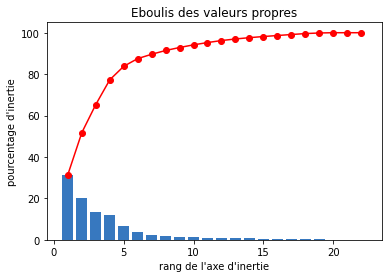

In [ ]:
#Eboulis des valeurs propres
functions.display_scree_plot(pca)

In [ ]:
# pourcentage de la variance expliquée pour chaque composantes
print('variance expliquée pour chaque composantes: %s' % str(pca.explained_variance_ratio_))

variance expliquée pour chaque composantes: [3.15228537e-01 2.02456777e-01 1.35656032e-01 1.19218180e-01
 6.52567089e-02 3.71797077e-02 2.09099371e-02 1.82590973e-02
 1.44265773e-02 1.28143946e-02 1.10401484e-02 9.72789379e-03
 7.54294858e-03 6.36139457e-03 5.45360208e-03 4.89628370e-03
 4.82494815e-03 4.54055569e-03 2.89334559e-03 1.31293197e-03
 4.16247804e-33 6.17856413e-34]


In [ ]:
Variance = pca.explained_variance_ratio_
for i in range(7):
    print("Variance avec " + str(i+1) + " composante(s) : " + str(sum(Variance[:i+1])))

Variance avec 1 composante(s) : 0.3152285365253575
Variance avec 2 composante(s) : 0.5176853134784063
Variance avec 3 composante(s) : 0.653341345089575
Variance avec 4 composante(s) : 0.7725595247114714
Variance avec 5 composante(s) : 0.8378162336109485
Variance avec 6 composante(s) : 0.8749959412726195
Variance avec 7 composante(s) : 0.8959058783657126


Une seule composante ne suffit pas, 5 composantes permettre d'arriver à 83%, ce qui semble acceptable.

In [ ]:
## Fabrication de la dataframe PCA avec 5 composantes
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df_sample_norm_PCA)
principalDf = pad.DataFrame(data = principalComponents, columns = ['principal component_1', 'principal component_2', 'principal component_3', 'principal component_4', 'principal component_5'])

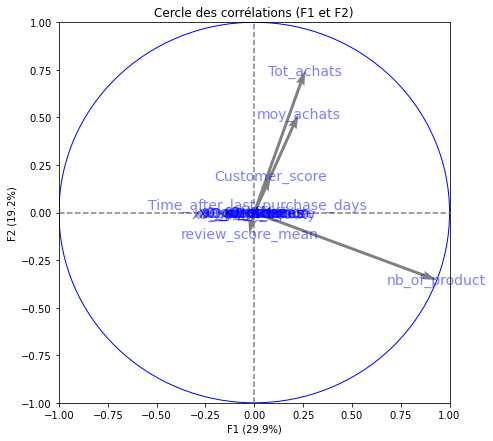

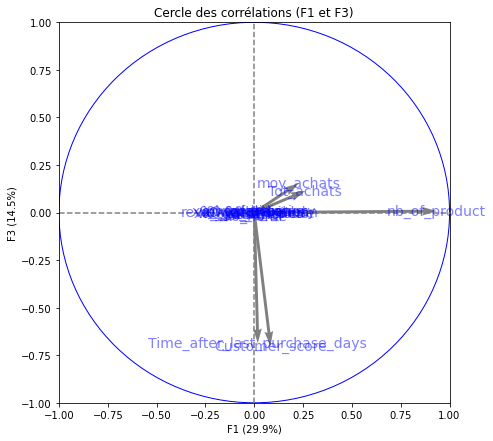

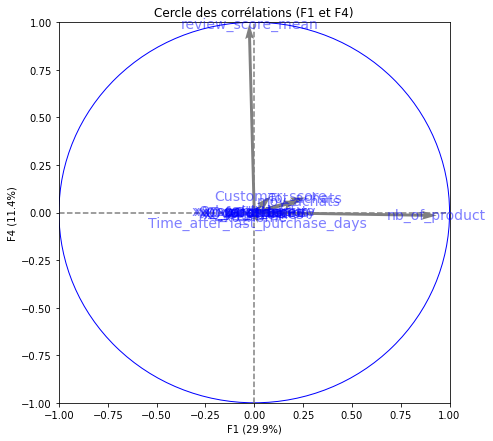

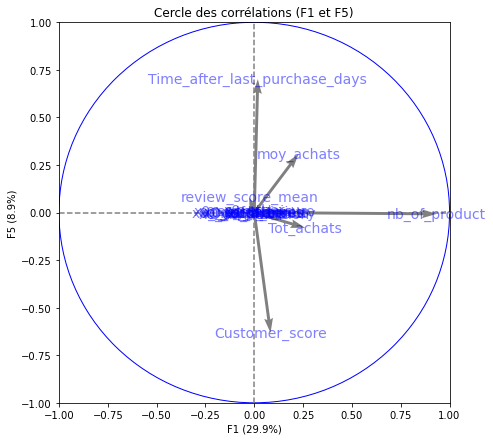

In [ ]:
## Fabrication du cercle de corrélations pour avoir une représentation des corrélations quantitatives avec le nutriscore
pcs = pca.components_
functions.display_circles(pcs, 5, pca, [(0,1), (0,2), (0,3), (0,4)], labels = np.array(df_sample_norm_PCA.columns))

F1 : Nombre de produits achetés

F2 : Montant de produits achetés

F3 : Temps après dernier achat et Score RFM des clients

F4 : Score des commentaires

F5 : Temps après dernier achat et Score RFM des clients

### Kmeans

In [ ]:
inertia = {}
dict_kmeans = {}
for k in range(1,25):
    kmeans = KMeans(n_clusters=k, verbose=1, random_state=7).fit(df_sample_norm)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Iteration 5, inertia 270964.1976733505
Iteration 6, inertia 270664.9274481169
Iteration 7, inertia 270448.7244372914
Iteration 8, inertia 270352.82579319965
Iteration 9, inertia 270312.362856594
Iteration 10, inertia 270290.5275286
Iteration 11, inertia 270282.9604602023
Iteration 12, inertia 270278.883776455
Iteration 13, inertia 270277.64805462933
Iteration 14, inertia 270277.3884320663
Iteration 15, inertia 270276.96990181867
Iteration 16, inertia 270276.5280636039
Iteration 17, inertia 270276.3990290122
Converged at iteration 17: center shift 5.558107407426983e-08 within tolerance 3.7366768884244164e-05.
Initialization complete
Iteration 0, inertia 433231.19286758674
Iteration 1, inertia 324747.07471132796
Iteration 2, inertia 319864.54824398883
Iteration 3, inertia 319031.16204493376
Iteration 4, inertia 318540.5151989099
Iteration 5, inertia 318019.04375466134
Iteration 6, inertia 317659.6039753746
Iter

/home/aureliencd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


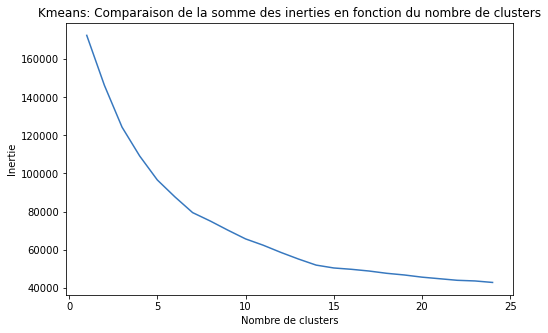

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
ax = sns.lineplot(list(inertia.keys()), list(inertia.values()))
fig = ax.get_figure()
fig.savefig("Inertie en fonction du nombre de cluster KMeans", dpi=400)

On a un coude à 7 clusters

Métric d'efficacité du clustering : Coefficient de silhouette

In [ ]:
silhouettes_kmeans = {}
for i in range(2,13):
    silhouettes_kmeans[i] = silhouette_score(X = df_sample_norm, labels= list(dict_kmeans[(i)].labels_))

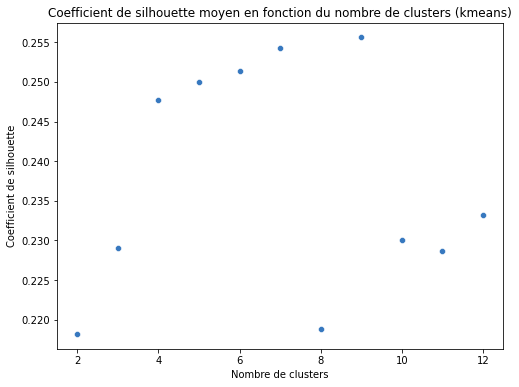

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
ax = sns.scatterplot(x = list(silhouettes_kmeans.keys()), y = list(silhouettes_kmeans.values()))
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
fig = ax.get_figure()
fig.savefig("Coef silhouette en fonction du nombre de cluster KMeans", dpi=400)
plt.show()

Le nombre de cluster permettant d'obtenir le meilleur coefficient de silhouette est de 7 ou 9

Métric d'efficacité du clustering : score de davies boulin

In [ ]:
davies_bouldin_kmeans = {}
for i in range(2,13):
    davies_bouldin_kmeans[i] = davies_bouldin_score(X = df_sample_norm, labels= list(dict_kmeans[(i)].labels_))

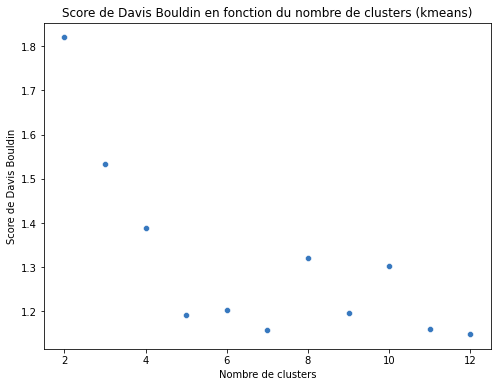

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Score de Davis Bouldin en fonction du nombre de clusters (kmeans)')
ax = sns.scatterplot(x = list(davies_bouldin_kmeans.keys()), y = list(davies_bouldin_kmeans.values()))
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Davis Bouldin')
fig = ax.get_figure()
fig.savefig("Score davis Bouldin en fonction du nombre de cluster KMeans", dpi=400)
plt.show()

Comme pour l'analyse des inerties, le nombre de clusters idéal pour le score de Davis bouldin semble être 7. 

Représentation T-SNE

In [ ]:
tsne = TSNE(n_components=2, perplexity = 40)
T = tsne.fit_transform(df_sample_norm.copy())

/home/aureliencd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


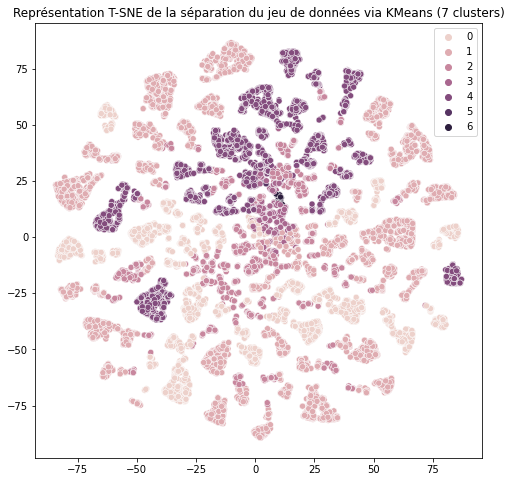

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (7 clusters)')
ax = sns.scatterplot(T[:,0], T[:,1], hue=dict_kmeans[(7)].labels_, legend='full')
fig = ax.get_figure()
fig.savefig("T-SNE KMeans_7clusters", dpi=400)

### DBSCAN

Le DBSCAN a deux hyperparamètres principaux (epsilon et min_samples) je fais une double boucle pour étudier la combinaison optimale (celle permettant d'avoir un score de silhouette maximale)

In [ ]:
for eps in range(5):
    for min_samples in range(3):
      Dbscan = DBSCAN(eps = eps+1, min_samples=min_samples+4).fit(df_sample_norm)
      print("Pour un epsilon à " + str(eps+1) + " et un min_samples à " + str(min_samples+4) + " le score de silhouette est de : " + str(silhouette_score(X = df_sample_norm, labels= Dbscan.labels_, random_state = 7)))

Pour un epsilon à 1 et un min_samples à 4 le score de silhouette est de : -0.02547229145596191
Pour un epsilon à 1 et un min_samples à 5 le score de silhouette est de : -0.02606307721468717
Pour un epsilon à 1 et un min_samples à 6 le score de silhouette est de : -0.018707430174003378
Pour un epsilon à 2 et un min_samples à 4 le score de silhouette est de : 0.3872055065013864
Pour un epsilon à 2 et un min_samples à 5 le score de silhouette est de : 0.5102204299834996
Pour un epsilon à 2 et un min_samples à 6 le score de silhouette est de : 0.7764247805414562
Pour un epsilon à 3 et un min_samples à 4 le score de silhouette est de : 0.7117885568052662
Pour un epsilon à 3 et un min_samples à 5 le score de silhouette est de : 0.7794984185100369
Pour un epsilon à 3 et un min_samples à 6 le score de silhouette est de : 0.779373305017066
Pour un epsilon à 4 et un min_samples à 4 le score de silhouette est de : 0.8167049613220082
Pour un epsilon à 4 et un min_samples à 5 le score de silhouette

In [ ]:
#plante mémoire collab
#Dbscan = DBSCAN(eps = 100, min_samples=10).fit(df_sample_norm)
#silhouette_score(X = df_sample_norm, labels= Dbscan.labels_, random_state = 7))

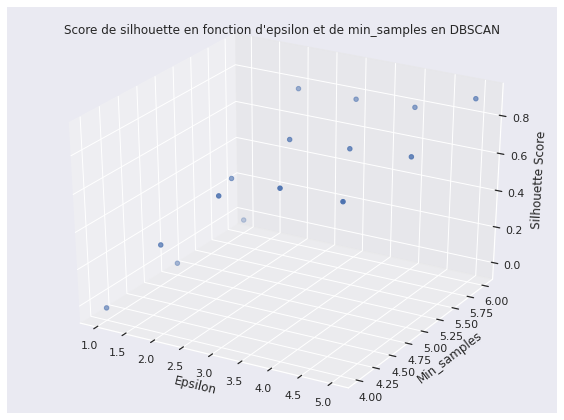

In [ ]:
eps = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]
min_samples = [4,5,6,4,5,6,4,5,6,4,5,6,4,5,6]
silh_score = [-0.025,-0.026,-0.019,0.389,0.510,0.776,0.712,0.779,0.779,0.817,0.794,0.796,0.816,0.816,0.901]

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

x = eps
y = min_samples
z = silh_score

ax.set_xlabel("Epsilon")
ax.set_ylabel("Min_samples")
ax.set_zlabel("Silhouette Score")

ax.scatter(x, y,z)

plt.title("Score de silhouette en fonction d'epsilon et de min_samples en DBSCAN")

plt.savefig("3d silhouette DBSCAN", dpi=400)

plt.tight_layout()
plt.show()

Je représente la classification que cela fait avec les "meilleurs" hyperparamètres

/home/aureliencd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


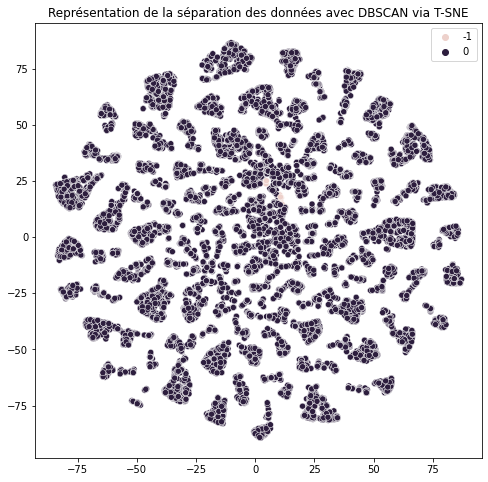

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données avec DBSCAN via T-SNE')
ax = sns.scatterplot(T[:,0], T[:,1], Dbscan.labels_)
fig = ax.get_figure()
#fig.savefig("T-SNE DBscan", dpi=400)

Le clustering par DBSCAN ne semble pas être adapté aux données, car malgrès un score de silhouette très intéressant il ne propose qu'une séparation par deux clusters, la densité des données doit être trop similair.

### Clustering Hiérarchique

Pour le clustering hiérarchique, je fais varier le nombre de cluster et je regarde le score de silhouette ainsi que le nombre de cluster proposé

In [ ]:
score_silhouette = []
score_davies_bouldin_clust_hiérar = []
nb_cluster_Clust_hier = []
for i in range(8):
    Clust_hierarchique = AgglomerativeClustering(n_clusters = i+2).fit(df_sample_norm)
    nb_cluster_Clust_hier.append(i+2)
    score_silhouette.append(silhouette_score(X = df_sample_norm, labels= Clust_hierarchique.labels_))
    score_davies_bouldin_clust_hiérar.append(davies_bouldin_score(X = df_sample_norm, labels= Clust_hierarchique.labels_))  

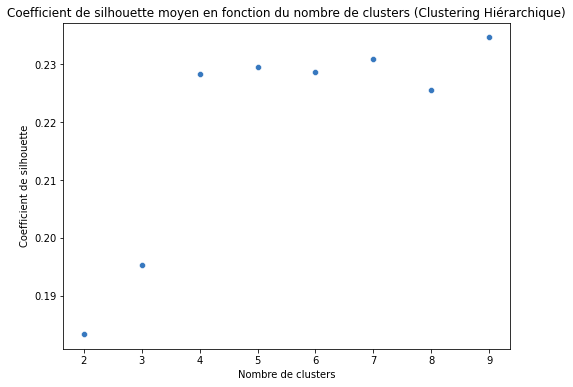

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (Clustering Hiérarchique)')
ax = sns.scatterplot(x = nb_cluster_Clust_hier, y = score_silhouette)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
fig = ax.get_figure()
#fig.savefig("Coef silhouette en fonction du nombre de cluster Clustering Hiérarchique", dpi=400)
plt.show()

Un nombre de cluster de 7 ou 9 semble être optimal au niveau du score de silhouette et potentiellement intéressant pour notre segmentation des clients

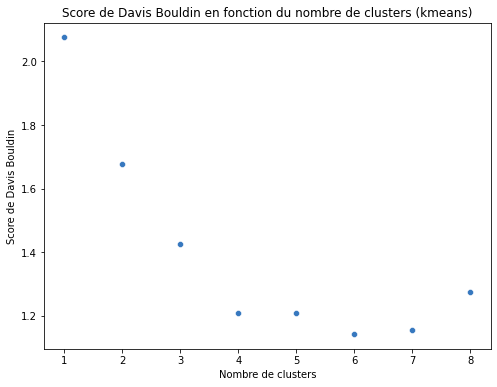

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Score de Davis Bouldin en fonction du nombre de clusters (Clusering hiérarchique)')
ax = sns.scatterplot(x = np.arange(1,9), y = score_davies_bouldin_clust_hiérar)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Davis Bouldin')
fig = ax.get_figure()
fig.savefig("Score davis Bouldin en fonction du nombre de cluster Clust-hiérarchique", dpi=400)
plt.show()

Ce nombre de cluster de 7 semble être optimal ausi au niveau du score de Davis Bouldin

In [ ]:
Clust_hierarchique = AgglomerativeClustering(n_clusters = 7).fit(df_sample_norm)

/home/aureliencd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


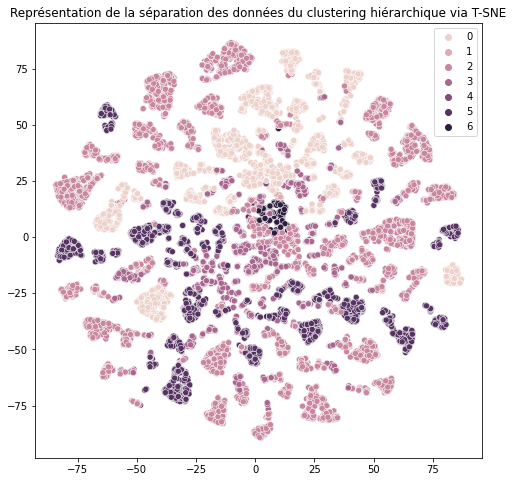

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du clustering hiérarchique via T-SNE')
ax = sns.scatterplot(T[:,0], T[:,1], Clust_hierarchique.labels_)
fig = ax.get_figure()
fig.savefig("T-SNE Clustering hiérarchique", dpi=400)

# Analyse du clutering en catégorie clients

## Création des databases des résultats

In [ ]:
new_df_sample_raw  = df_sample
new_df_sample_raw["Clustering_hiérarchique"] = Clust_hierarchique.labels_[:24256]
new_df_sample_raw["Clustering_Kmeans"] = dict_kmeans[(7)].labels_[:24256]
new_df_sample_raw

,customer_state,payment_type,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Main_prod_category,Tot_achats,Customer_level,Clustering_Kmeans
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,SP,credit_card,5.0,160.273507,1,129.90,home,141.90,Client tiède,2
0000b849f77a49e4a4ce2b2a4ca5be3f,SP,credit_card,4.0,163.263090,1,18.90,health_beauty,27.19,Client tiède,2
0000f46a3911fa3c0805444483337064,SC,credit_card,3.0,585.850868,1,69.00,office,86.22,Bon client,3
0000f6ccb0745a6a4b88665a16c9f078,PA,credit_card,4.0,369.875428,1,25.99,electronics,43.62,Client tiède,3
0004aac84e0df4da2b147fca70cf8255,SP,credit_card,5.0,336.905972,1,180.00,electronics,196.89,Bon client,0
...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,PE,credit_card,5.0,495.853958,4,1570.00,health_beauty,4134.84,Très bon client,3
fffea47cd6d3cc0a88bd621562a9d061,BA,credit_card,4.0,310.890532,1,64.89,health_beauty,84.58,Client tiède,2
ffff371b4d645b6ecea244b27531430a,MT,credit_card,5.0,617.070162,1,89.90,auto,112.46,Bon client,0


In [ ]:
df_results_keams = pad.DataFrame(index = ["Label 1", "Label 2", "Label 3", "Label 4", "Label 5", "Label 6", "Label 7"])
df_results_clu_hiérar = pad.DataFrame(index = ["Label 1", "Label 2", "Label 3", "Label 4", "Label 5", "Label 6", "Label 7"])

In [ ]:
list_quant_feat = ['review_score_mean', 'Time_after_last_purchase_days', 'nb_of_product', 'moy_achats','Tot_achats']

Pour connaitre le nombre de client par label

In [ ]:
print("Nombre de client par label pour le Clustering KMeans : ") 
for elm in new_df_sample_raw['Clustering_Kmeans'].unique():
    print(len(new_df_sample_raw[new_df_sample_raw['Clustering_Kmeans'] == elm]['nb_of_product']))

print("Nombre de client par label pour le Clustering hiérarchique : ")   
for elm in new_df_sample_raw['Clustering_hiérarchique'].unique():
    print(len(new_df_sample_raw[new_df_sample_raw['Clustering_hiérarchique'] == elm]['nb_of_product']))

In [ ]:
def print_results_cat_client(feature, clustering):
"""
To get the values of the different variables in function of the KMeans of hierarchical clustering classification
Input variables are the feature and the clustering method to analyse
This return dataframe with the values and the labels of the clustering
"""
    print("Pour la classification " + str(clustering) + " est le feature " + str(feature))

    if clustering == "Clustering_Kmeans":
      results= []
      for elm in new_df_sample_raw[clustering].unique():
        print("La moyenne du label " + str(elm) + " est de " +str(new_df_sample_raw[new_df_sample_raw[clustering] == elm][feature].mean()))
        results.append(new_df_sample_raw[new_df_sample_raw[clustering] == elm][feature].mean())
      df_results_keams[feature] = results

    if clustering == "Clustering_hiérarchique":
      results= []
      for elm in new_df_sample_raw[clustering].unique():
        print("La moyenne du label " + str(elm) + " est de " +str(new_df_sample_raw[new_df_sample_raw[clustering] == elm][feature].mean()))
        results.append(new_df_sample_raw[new_df_sample_raw[clustering] == elm][feature].mean())
      df_results_clu_hiérar[feature] = results

In [ ]:
for elm in list_quant_feat:
    print_results_cat_client(elm, "Clustering_Kmeans")
    print_results_cat_client(elm, "Clustering_hiérarchique")

Pour la classification Clustering_Kmeans est le feature review_score_mean
La moyenne du label 2 est de 4.10628358063539
La moyenne du label 3 est de 4.086797187448491
La moyenne du label 0 est de 4.089821801759339
La moyenne du label 5 est de 4.103617826113925
La moyenne du label 4 est de 4.100296131524505
La moyenne du label 6 est de 4.282051282051282
La moyenne du label 1 est de 4.111111111111111
Pour la classification Clustering_Kmeans est le feature Time_after_last_purchase_days
La moyenne du label 2 est de 284.5373661531271
La moyenne du label 3 est de 286.28108305257194
La moyenne du label 0 est de 287.34176171529754
La moyenne du label 5 est de 287.99885692759943
La moyenne du label 4 est de 285.60135120973735
La moyenne du label 6 est de 292.3692702397911
La moyenne du label 1 est de 285.171450617284
Pour la classification Clustering_Kmeans est le feature nb_of_product
La moyenne du label 2 est de 2.2345701774602444
La moyenne du label 3 est de 2.3216432865731464
La moyenne du 

In [ ]:
df_results_keams

,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Tot_achats
Label 1,4.106284,284.537366,2.234570,143.826433,226.062004
Label 2,4.086797,286.281083,2.321643,147.413755,234.923854
Label 3,4.089822,287.341762,2.461237,148.063506,228.199973
Label 4,4.103618,287.998857,2.738048,145.731990,231.503459
Label 5,4.100296,285.601351,1.919262,146.004682,207.268374
Label 6,4.282051,292.369270,1.564103,161.579487,252.443590
Label 7,4.111111,285.171451,1.777778,124.247037,157.010000


In [ ]:
df_results_clu_hiérar

,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Tot_achats,Customer_score
Label 1,4.094630,286.130964,2.298055,150.747547,238.335855,5.927196
Label 2,4.075733,286.433775,2.288994,142.850759,230.107647,5.909108
Label 3,4.102199,284.555046,2.264368,143.214413,211.897021,5.930715
Label 4,4.035962,293.311748,1.817204,149.250896,239.746882,6.150538
Label 5,4.117619,283.223166,2.408853,144.068198,228.214624,5.941371
Label 6,4.147059,274.109042,3.323529,84.460858,222.088824,5.823529
Label 7,3.966667,303.418486,2.000000,103.753000,218.221667,6.333333


## Réprésentation graphique des variables d'intérêts

In [ ]:
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette) 

KMeans

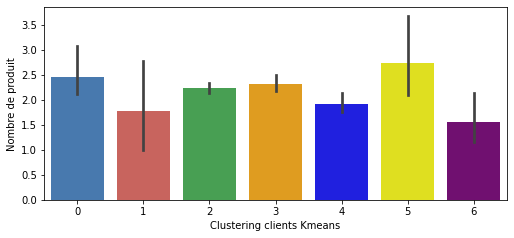

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_Kmeans"], y = new_df_sample_raw["nb_of_product"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans")
ax.set_ylabel('Nombre de produit')
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering KMeans nb-produits", dpi=400)
plt.tight_layout()

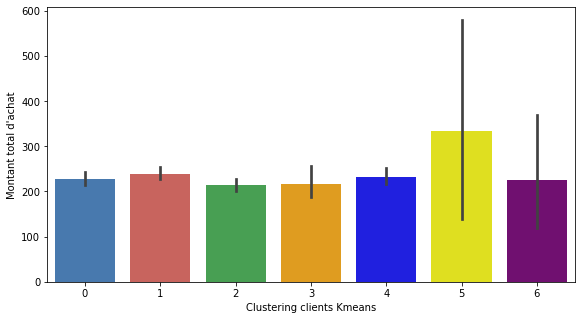

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_Kmeans"], y = new_df_sample_raw["Tot_achats"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans")
ax.set_ylabel("Montant total d'achat")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering KMeans tot achat", dpi=400)
plt.tight_layout()

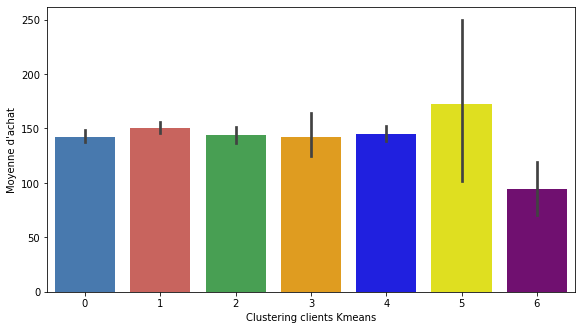

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_Kmeans"], y = new_df_sample_raw["moy_achats"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans")
ax.set_ylabel("Moyenne d'achat")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering KMeans moyenne achat", dpi=400)
plt.tight_layout()

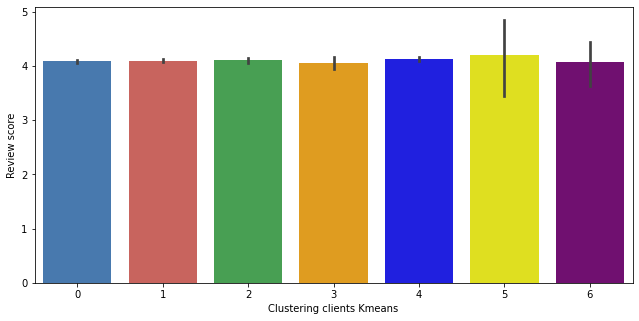

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_Kmeans"], y = new_df_sample_raw["review_score_mean"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans")
ax.set_ylabel("Review score")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering KMeans score", dpi=400)
plt.tight_layout()

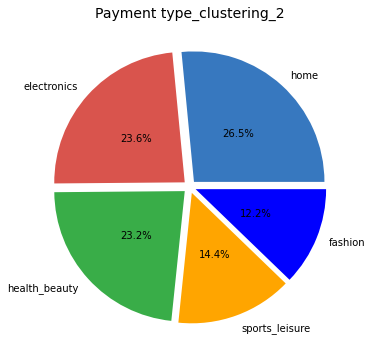

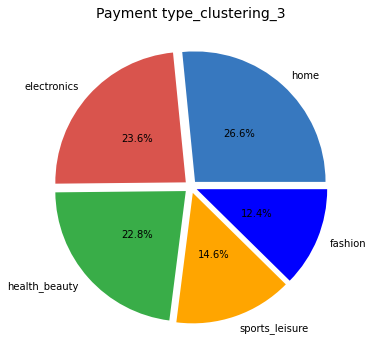

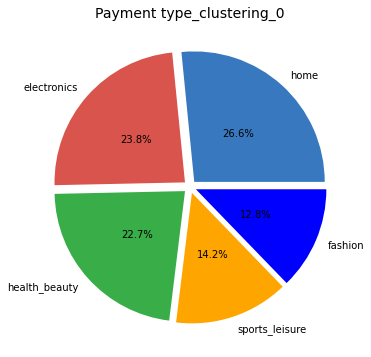

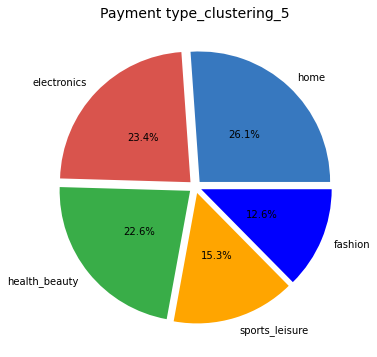

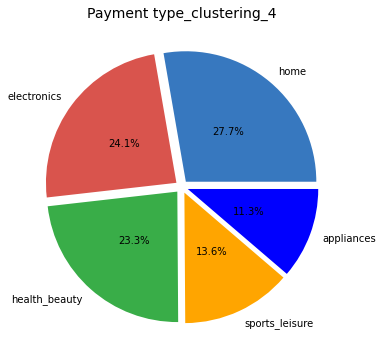

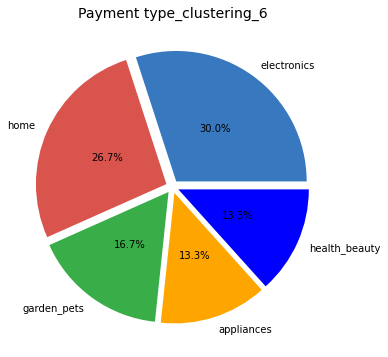

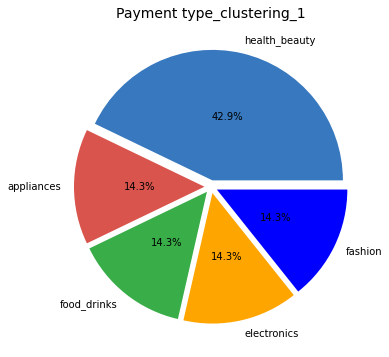

In [ ]:
for elm in new_df_sample_raw['Clustering_Kmeans'].unique():
    data = new_df_sample_raw[new_df_sample_raw['Clustering_Kmeans'] == elm]['Main_prod_category'].value_counts().head(5)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = new_df_sample_raw[new_df_sample_raw['Clustering_Kmeans'] == elm]['Main_prod_category'].value_counts().head(5).index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title("Payment type_clustering_" + str(elm), fontsize=14)

Clustering hiérarchique

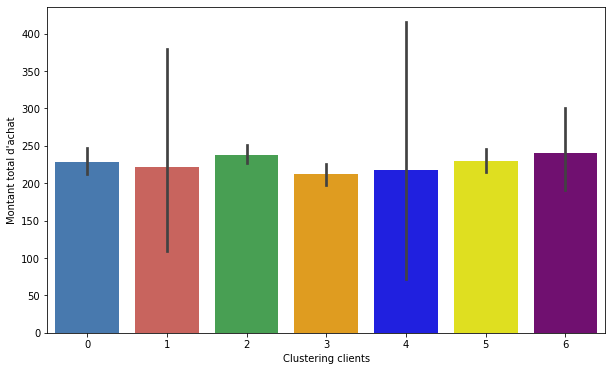

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_hiérarchique"], y = new_df_sample_raw["Tot_achats"].values, orient='v')
ax.set_xlabel("Clustering clients")
ax.set_ylabel("Montant total d'achat")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering hiérar montant total", dpi=400)

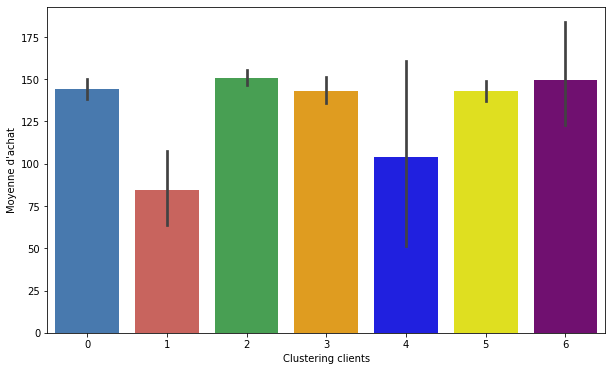

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_hiérarchique"], y = new_df_sample_raw["moy_achats"].values, orient='v')
ax.set_xlabel("Clustering clients")
ax.set_ylabel("Moyenne d'achat")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering hiérar montant moyen", dpi=400)

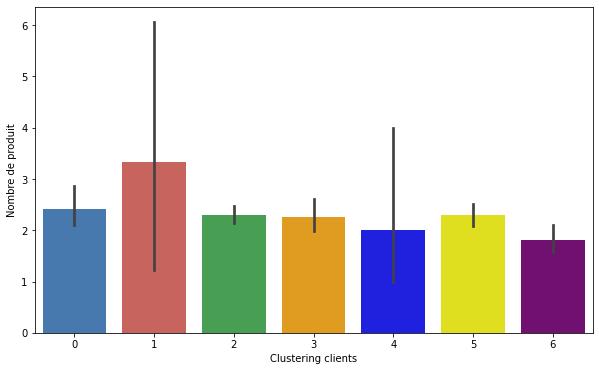

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_hiérarchique"], y = new_df_sample_raw["nb_of_product"].values, orient='v')
ax.set_xlabel("Clustering clients")
ax.set_ylabel("Nombre de produit")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering hiérar nombre de produit", dpi=400)

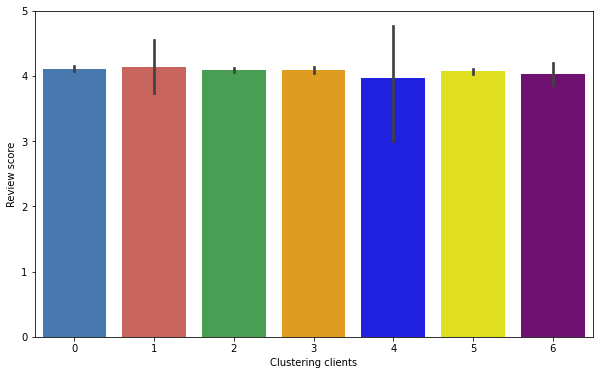

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = new_df_sample_raw["Clustering_hiérarchique"], y = new_df_sample_raw["review_score_mean"].values, orient='v')
ax.set_xlabel("Clustering clients")
ax.set_ylabel("Review score")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
figure.savefig("Clustering hiérar review score", dpi=400)

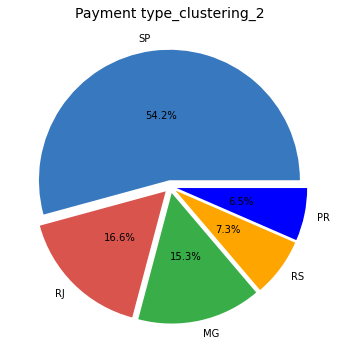

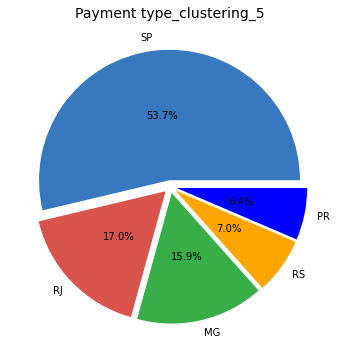

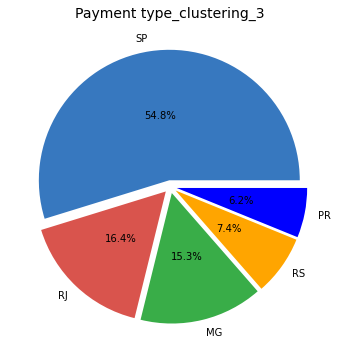

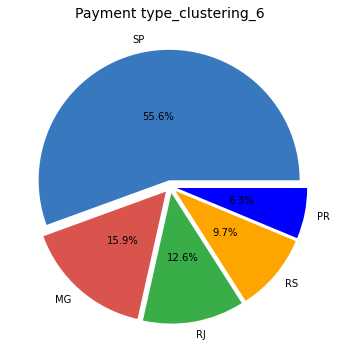

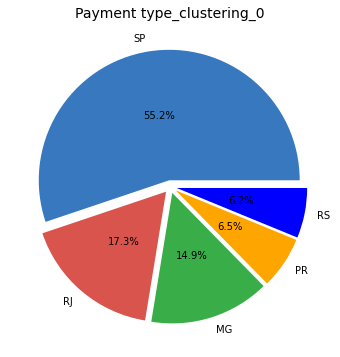

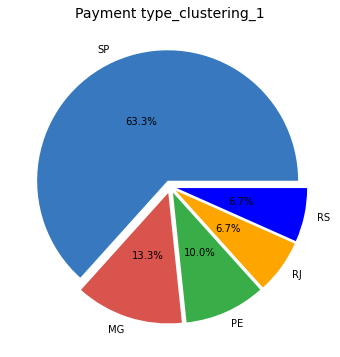

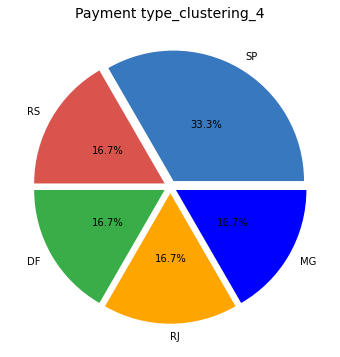

In [ ]:
for elm in new_df_sample_raw['Clustering_hiérarchique'].unique():
    data = new_df_sample_raw[new_df_sample_raw['Clustering_hiérarchique'] == elm]['customer_state'].value_counts().head(5)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = new_df_sample_raw[new_df_sample_raw['Clustering_hiérarchique'] == elm]['customer_state'].value_counts().head(5).index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title("Payment type_clustering_" + str(elm), fontsize=14);

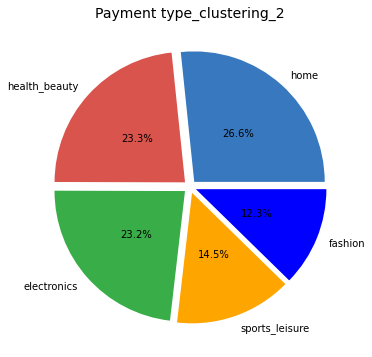

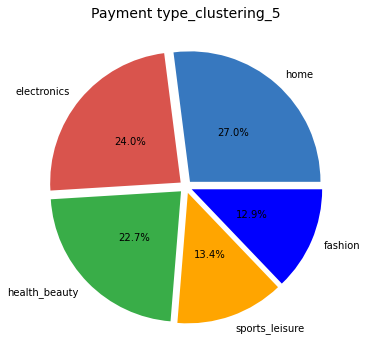

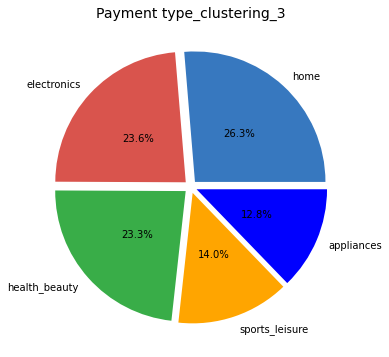

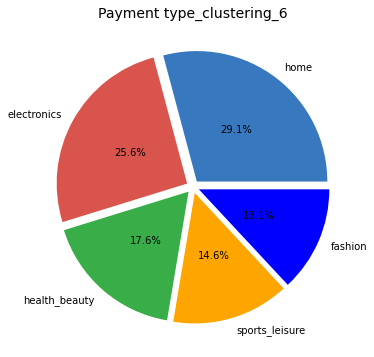

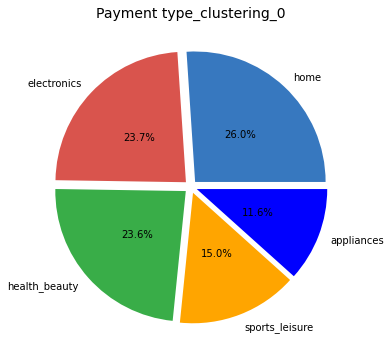

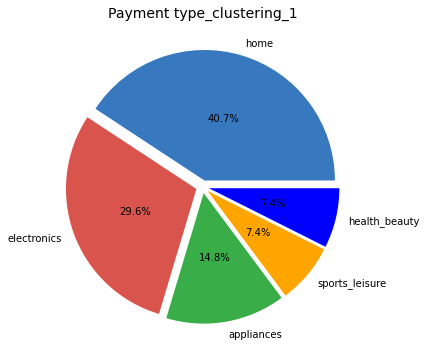

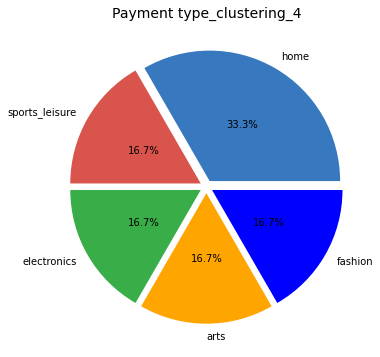

In [ ]:
for elm in new_df_sample_raw['Clustering_hiérarchique'].unique():
    data = new_df_sample_raw[new_df_sample_raw['Clustering_hiérarchique'] == elm]['Main_prod_category'].value_counts().head(5)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = new_df_sample_raw[new_df_sample_raw['Clustering_hiérarchique'] == elm]['Main_prod_category'].value_counts().head(5).index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title("Payment type_clustering_" + str(elm), fontsize=14);

# Préparation des données pour l'étude de la périodicité de la maintenance

In [ ]:
df_sample_norm

,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Tot_achats,Customer_score,x0_appliances,x0_arts,x0_auto,x0_construction,x0_electronics,x0_fashion,x0_food_drinks,x0_garden_pets,x0_health_beauty,x0_home,x0_office,x0_other,x0_sports_leisure
customer_unique_id,,,,,,,,,,,,,,,,,,,
00090324bbad0e9342388303bb71ba0a,0.679205,-0.513374,-0.129213,-0.411106,-0.284463,-1.177823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
001147e649a7b1afd577e873841632dd,-0.071921,0.829506,0.166446,0.099962,0.328725,-0.567316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0011805441c0d1b68b48002f1d005526,-0.823046,1.675945,-0.129213,0.521417,0.112495,0.653697,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0015752e079902b12cd00b9b7596276b,0.679205,-1.372935,0.166446,-0.369173,-0.138282,0.043191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
001926cef41060fae572e2e7b30bd2a4,-0.071921,0.922431,0.166446,-0.416044,-0.082550,-0.567316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2ae16b99c6f3c785f0e052f2a9cfb,0.679205,-0.689324,-0.129213,-0.070579,-0.051130,-1.177823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fff3e1d7bc75f11dc7670619b2e61840,0.679205,-1.286476,-0.129213,-0.390246,-0.252415,0.043191,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fff5eb4918b2bf4b2da476788d42051c,0.679205,-1.169291,3.320142,3.846228,28.629018,3.095724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_sample_norm = df_sample_norm.drop(df_sample_norm.index[24255:24807]) 
df_maintenance = pad.merge(df_sample[features_Quant]["Time_after_last_purchase_days"], pad.DataFrame(columns = df_sample_norm.columns, data = df_sample_norm).set_index(df_sample[features_Quant]["Time_after_last_purchase_days"].index), left_index = True, right_index = True)

In [ ]:
df_maintenance.to_csv('data_projet4_data_maintenance.csv', sep='\t', index=True)

# Intérêt des variables additionnelles au RFM

L'idée est ici de voir si une classification utilisant uniquement le RFM n'est pas aussi bon que quand on ajoute les autres variables utilisées dans ce projet (catégorie de produit acheté, état...)

In [ ]:
df_sample_norm

,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Tot_achats,x0_appliances,x0_arts,x0_auto,x0_construction,x0_electronics,...,x0_garden_pets,x0_health_beauty,x0_home,x0_office,x0_other,x0_sports_leisure,x1_Bon client,x1_Client tiède,x1_Inactif,x1_Très bon client
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
00090324bbad0e9342388303bb71ba0a,0.679205,-0.513374,-0.129213,-0.411106,-0.284463,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
001147e649a7b1afd577e873841632dd,-0.071921,0.829506,0.166446,0.099962,0.328725,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0011805441c0d1b68b48002f1d005526,-0.823046,1.675945,-0.129213,0.521417,0.112495,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0015752e079902b12cd00b9b7596276b,0.679205,-1.372935,0.166446,-0.369173,-0.138282,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
001926cef41060fae572e2e7b30bd2a4,-0.071921,0.922431,0.166446,-0.416044,-0.082550,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff2ae16b99c6f3c785f0e052f2a9cfb,0.679205,-0.689324,-0.129213,-0.070579,-0.051130,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
fff3e1d7bc75f11dc7670619b2e61840,0.679205,-1.286476,-0.129213,-0.390246,-0.252415,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
fff5eb4918b2bf4b2da476788d42051c,0.679205,-1.169291,3.320142,3.846228,28.629018,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_RFM_modelisation = df_sample_norm[['x1_Bon client',	'x1_Client tiède',	'x1_Inactif',	'x1_Très bon client']]

In [ ]:
df_RFM_modelisation

,x1_Bon client,x1_Client tiède,x1_Inactif,x1_Très bon client
customer_unique_id,,,,
00090324bbad0e9342388303bb71ba0a,0.0,1.0,0.0,0.0
001147e649a7b1afd577e873841632dd,0.0,0.0,0.0,1.0
0011805441c0d1b68b48002f1d005526,0.0,0.0,0.0,1.0
0015752e079902b12cd00b9b7596276b,0.0,1.0,0.0,0.0
001926cef41060fae572e2e7b30bd2a4,1.0,0.0,0.0,0.0
...,...,...,...,...
fff2ae16b99c6f3c785f0e052f2a9cfb,0.0,1.0,0.0,0.0
fff3e1d7bc75f11dc7670619b2e61840,0.0,1.0,0.0,0.0
fff5eb4918b2bf4b2da476788d42051c,0.0,1.0,0.0,0.0


In [ ]:
inertia = {}
dict_kmeans = {}
for k in range(1,25):
    kmeans = KMeans(n_clusters=k, verbose=1, random_state=7).fit(df_RFM_modelisation)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans

Initialization complete
Iteration 0, inertia 21696.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 34000.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21696.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21696.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21696.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21696.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 34000.0.
Iteration 1, inertia 14308.545630442624.
Converged at iteration 1: strict convergence.
Initializatio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 6, inertia 1.5810798957509056e-23
Iteration 7, inertia 6.4234585680857e-23
Iteration 8, inertia 1.5810798957509056e-23
Iteration 9, inertia 6.4234585680857e-23
Iteration 10, inertia 1.5810798957509056e-23
Iteration 11, inertia 6.4234585680857e-23
Iteration 12, inertia 1.5810798957509056e-23
Iteration 13, inertia 6.4234585680857e-23
Iteration 14, inertia 1.5810798957509056e-23
Iteration 15, inertia 6.4234585680857e-23
Iteration 16, inertia 1.5810798957509056e-23
Iteration 17, inertia 6.4234585680857e-23
Iteration 18, inertia 1.5810798957509056e-23
Iteration 19, inertia 6.4234585680857e-23
Iteration 20, inertia 1.5810798957509056e-23
Iteration 21, inertia 6.4234585680857e-23
Iteration 22, inertia 1.5810798957509056e-23
Iteration 23, inertia 6.4234585680857e-23
Iteration 24, inertia 1.5810798957509056e-23
Iteration 25, inertia 6.4234585680857e-23
Iteration 26, inertia 1.5810798957509056e-23
Iteration 27, inertia 6.4234585680857e-23
Iteration 28, inertia 1.5810798957509056e-23
It

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 22, inertia 1.5810798957509056e-23
Iteration 23, inertia 6.4234585680857e-23
Iteration 24, inertia 1.5810798957509056e-23
Iteration 25, inertia 6.4234585680857e-23
Iteration 26, inertia 1.5810798957509056e-23
Iteration 27, inertia 6.4234585680857e-23
Iteration 28, inertia 1.5810798957509056e-23
Iteration 29, inertia 6.4234585680857e-23
Iteration 30, inertia 1.5810798957509056e-23
Iteration 31, inertia 6.4234585680857e-23
Iteration 32, inertia 1.5810798957509056e-23
Iteration 33, inertia 6.4234585680857e-23
Iteration 34, inertia 1.5810798957509056e-23
Iteration 35, inertia 6.4234585680857e-23
Iteration 36, inertia 1.5810798957509056e-23
Iteration 37, inertia 6.4234585680857e-23
Iteration 38, inertia 1.5810798957509056e-23
Iteration 39, inertia 6.4234585680857e-23
Iteration 40, inertia 1.5810798957509056e-23
Iteration 41, inertia 6.4234585680857e-23
Iteration 42, inertia 1.5810798957509056e-23
Iteration 43, inertia 6.4234585680857e-23
Iteration 44, inertia 1.5810798957509056e-2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.960650569517654e-23
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.960650569517654e-23
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.960650569517654e-23
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, iner

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 6.4234585680857e-23
Iteration 5, inertia 1.5810798957509056e-23
Iteration 6, inertia 6.4234585680857e-23
Iteration 7, inertia 1.5810798957509056e-23
Iteration 8, inertia 6.4234585680857e-23
Iteration 9, inertia 1.5810798957509056e-23
Iteration 10, inertia 6.4234585680857e-23
Iteration 11, inertia 1.5810798957509056e-23
Iteration 12, inertia 6.4234585680857e-23
Iteration 13, inertia 1.5810798957509056e-23
Iteration 14, inertia 6.4234585680857e-23
Iteration 15, inertia 1.5810798957509056e-23
Iteration 16, inertia 6.4234585680857e-23
Iteration 17, inertia 1.5810798957509056e-23
Iteration 18, inertia 6.4234585680857e-23
Iteration 19, inertia 1.5810798957509056e-23
Iteration 20, inertia 6.4234585680857e-23
Iteration 21, inertia 1.5810798957509056e-23
Iteration 22, inertia 6.4234585680857e-23
Iteration 23, inertia 1.58

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.946928975752673e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.946928975752673e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.946928975752673e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.946928975752673e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.946928975752673e-23
Converged at itera

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 6.4234585680857e-23
Iteration 5, inertia 1.5810798957509056e-23
Iteration 6, inertia 6.4234585680857e-23
Iteration 7, inertia 1.5810798957509056e-23
Iteration 8, inertia 6.4234585680857e-23
Iteration 9, inertia 1.5810798957509056e-23
Iteration 10, inertia 6.4234585680857e-23
Iteration 11, inertia 1.5810798957509056e-23
Iteration 12, inertia 6.4234585680857e-23
Iteration 13, inertia 1.5810798957509056e-23
Iteration 14, inertia 6.4234585680857e-23
Iteration 15, inertia 1.5810798957509056e-23
Iteration 16, inertia 6.4234585680857e-23
Iteration 17, inertia 1.5810798957509056e-23
Iteration 18, inertia 6.4234585680857e-23
Iteration 19, inertia 1.5810798957509056e-23
Iteration 20, inertia 6.4234585680857e-23
Iteration 21, inertia 1.5810798957509056e-23
Iteration 22, inertia 6.4234585680857e-23
Iteration 23, inertia 1.5810798957509056e-23
Iterat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.951732492515973e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.951732492515973e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.951732492515973e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.951732492515973e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.8895905632713

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.976821431062672e-23
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.976821431062672e-23
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.976821431062672e-23
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 7.976821431062672e-23
Converged at iteration 4: strict convergence.
Initialization compl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 11, inertia 1.5810798957509056e-23
Iteration 12, inertia 6.4234585680857e-23
Iteration 13, inertia 1.5810798957509056e-23
Iteration 14, inertia 6.4234585680857e-23
Iteration 15, inertia 1.5810798957509056e-23
Iteration 16, inertia 6.4234585680857e-23
Iteration 17, inertia 1.5810798957509056e-23
Iteration 18, inertia 6.4234585680857e-23
Iteration 19, inertia 1.5810798957509056e-23
Iteration 20, inertia 6.4234585680857e-23
Iteration 21, inertia 1.5810798957509056e-23
Iteration 22, inertia 6.4234585680857e-23
Iteration 23, inertia 1.5810798957509056e-23
Iteration 24, inertia 6.4234585680857e-23
Iteration 25, inertia 1.5810798957509056e-23
Iteration 26, inertia 6.4234585680857e-23
Iteration 27, inertia 1.5810798957509056e-23
Iteration 28, inertia 6.4234585680857e-23
Iteration 29, inertia 1.5810798957509056e-23
Iteration 30, inertia 6.4234585680857e-23
Iteration 31, inertia 1.5810798957509056e-23
Iteration 32, inertia 6.4234585680857e-23
Iteration 33, inertia 1.5810798957509056e-2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 6.413368530203161e-23
Iteration 2, inertia 7.967025709595708e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 6.413368530203161e-23
Iteration 2, inertia 7.967025709595708e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 6.413368530203161e-23
Iteration 2, inertia 7.967025709595708e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 6.413368530203161e-23
Iteration 2, inertia 7.967025709595708e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 6.413368530203161e-23
Iteration 2, inertia 7.967025709595708e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 6.413368530203161e-23
Ite

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.967025709595708e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.967025709595708e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.967025709595708e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2, inertia 7.889590563271379e-23
Iteration 3, inertia 7.967025709595708e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 4.751945020139395e-25
Iteration 2,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 1.5810798957509056e-23
Iteration 4, inertia 6.4234585680857e-23
Iteration 5, inertia 1.5810798957509056e-23
Iteration 6, inertia 6.4234585680857e-23
Iteration 7, inertia 1.5810798957509056e-23
Iteration 8, inertia 6.4234585680857e-23
Iteration 9, inertia 1.5810798957509056e-23
Iteration 10, inertia 6.4234585680857e-23
Iteration 11, inertia 1.5810798957509056e-23
Iteration 12, inertia 6.4234585680857e-23
Iteration 13, inertia 1.5810798957509056e-23
Iteration 14, inertia 6.4234585680857e-23
Iteration 15, inertia 1.5810798957509056e-23
Iteration 16, inertia 6.4234585680857e-23
Iteration 17, inertia 1.5810798957509056e-23
Iteration 18, inertia 6.4234585680857e-23
Iteration 19, inertia 1.5810798957509056e-23
Iteration 20, inertia 6.4234585680857e-23
Iteration 21, inertia 1.5810798957509056e-23
Iteration 22, inertia 6.4234585680857e-23
Iter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 4, inertia 1.5810798957509056e-23
Iteration 5, inertia 6.4234585680857e-23
Iteration 6, inertia 1.5810798957509056e-23
Iteration 7, inertia 6.4234585680857e-23
Iteration 8, inertia 1.5810798957509056e-23
Iteration 9, inertia 6.4234585680857e-23
Iteration 10, inertia 1.5810798957509056e-23
Iteration 11, inertia 6.4234585680857e-23
Iteration 12, inertia 1.5810798957509056e-23
Iteration 13, inertia 6.4234585680857e-23
Iteration 14, inertia 1.5810798957509056e-23
Iteration 15, inertia 6.4234585680857e-23
Iteration 16, inertia 1.5810798957509056e-23
Iteration 17, inertia 6.4234585680857e-23
Iteration 18, inertia 1.5810798957509056e-23
Iteration 19, inertia 6.4234585680857e-23
Iteration 20, inertia 1.5810798957509056e-23
Iteration 21, inertia 6.4234585680857e-23
Iteration 22, inertia 1.5810798957509056e-23
Iteration 23, inertia 6.4234585680857e-23
Iteration 24, inertia 1.5810798957509056e-23
Iteration 25, inertia 6.4234585680857e-23
Iteration 26, inertia 1.5810798957509056e-23
Iter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.971889114883965e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.971889114883965e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.971889114883965e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.971889114883965e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.972233322668823e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.972233322668823e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.972233322668823e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 6.4234585680857e-23
Iteration 3, inertia 7.972233322668823e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 0, inertia 0.0
Iteration 1, inertia 7.97065726547815e-23
Iteration 2, inertia 1.5810798957509056e-23
Iteration 3, inertia 8.017816500990177e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 7.97065726547815e-23
Iteration 2, inertia 1.5810798957509056e-23
Iteration 3, inertia 8.017816500990177e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 7.97065726547815e-23
Iteration 2, inertia 1.5810798957509056e-23
Iteration 3, inertia 8.017816500990177e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 7.97065726547815e-23
Iteration 2, inertia 1.5810798957509056e-23
Iteration 3, inertia 8.017816500990177e-23
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 7.97065726547815e-23
Iteration 2, inertia 1.58107989575090

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 4, inertia 1.5810798957509056e-23
Iteration 5, inertia 6.4234585680857e-23
Iteration 6, inertia 1.5810798957509056e-23
Iteration 7, inertia 6.4234585680857e-23
Iteration 8, inertia 1.5810798957509056e-23
Iteration 9, inertia 6.4234585680857e-23
Iteration 10, inertia 1.5810798957509056e-23
Iteration 11, inertia 6.4234585680857e-23
Iteration 12, inertia 1.5810798957509056e-23
Iteration 13, inertia 6.4234585680857e-23
Iteration 14, inertia 1.5810798957509056e-23
Iteration 15, inertia 6.4234585680857e-23
Iteration 16, inertia 1.5810798957509056e-23
Iteration 17, inertia 6.4234585680857e-23
Iteration 18, inertia 1.5810798957509056e-23
Iteration 19, inertia 6.4234585680857e-23
Iteration 20, inertia 1.5810798957509056e-23
Iteration 21, inertia 6.4234585680857e-23
Iteration 22, inertia 1.5810798957509056e-23
Iteration 23, inertia 6.4234585680857e-23
Iteration 24, inertia 1.5810798957509056e-23
Iteration 25, inertia 6.4234585680857e-23
Iteration 26, inertia 1.5810798957509056e-23
Iter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (22). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017879095254114e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017879095254114e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017879095254114e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017879095254114e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017879095254114e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Ite

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (23). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017945712092369e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017945712092369e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017945712092369e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017945712092369e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.017945712092369e-23
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 0.0
Iteration 1, inertia 1.584711451633348e-23
Iteration 2, inertia 8.0179

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


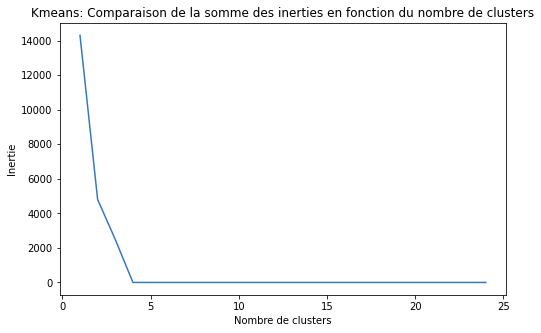

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
ax = sns.lineplot(list(inertia.keys()), list(inertia.values()))
fig = ax.get_figure()
fig.savefig("Inertie en fonction du nombre de cluster KMeans", dpi=400)

On a un coude à 4 clusters, ce qui est assez logique vu qu'on a en entrée les 4 segments du RFM

Métric d'efficacité du clustering : Coefficient de silhouette

In [ ]:
silhouettes_kmeans = {}
for i in range(2,13):
    silhouettes_kmeans[i] = silhouette_score(X = df_RFM_modelisation, labels= list(dict_kmeans[(i)].labels_))

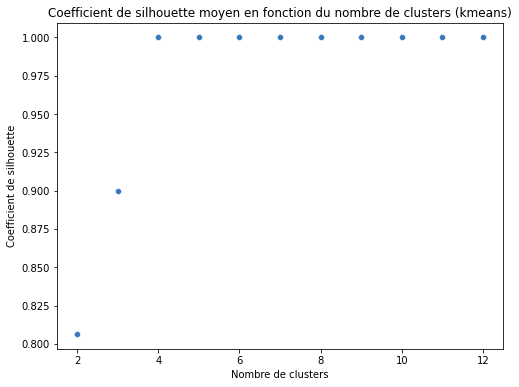

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
ax = sns.scatterplot(x = list(silhouettes_kmeans.keys()), y = list(silhouettes_kmeans.values()))
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
fig = ax.get_figure()
fig.savefig("Coef silhouette en fonction du nombre de cluster KMeans", dpi=400)
plt.show()

Le nombre de cluster permettant d'obtenir le meilleur coefficient de silhouette est de 4

In [ ]:
davies_bouldin_kmeans = {}
for i in range(2,13):
    davies_bouldin_kmeans[i] = davies_bouldin_score(X = df_RFM_modelisation, labels= list(dict_kmeans[(i)].labels_))

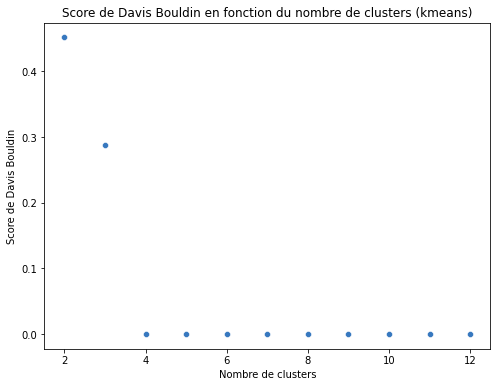

In [ ]:
plt.figure(figsize=(8,6)),
plt.title('Score de Davis Bouldin en fonction du nombre de clusters (kmeans)')
ax = sns.scatterplot(x = list(davies_bouldin_kmeans.keys()), y = list(davies_bouldin_kmeans.values()))
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Davis Bouldin')
fig = ax.get_figure()
fig.savefig("Score davis Bouldin en fonction du nombre de cluster KMeans", dpi=400)
plt.show()

Comme pour l'analyse des inerties et des coefficients de silhouette, le nombre de clusters idéal pour le score de Davis bouldin est de 4. 

In [ ]:
df_results_keams_RFM_only = pad.DataFrame(index = ["Label 1", "Label 2", "Label 3", "Label 4"])

In [ ]:
df_final_RFM  = df_sample
df_final_RFM["Clustering_Kmeans_RFM"] = dict_kmeans[(4)].labels_[:24256]

In [ ]:
df_final_RFM

,customer_state,payment_type,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Main_prod_category,Tot_achats,Customer_level,Clustering_Kmeans_RFM
customer_unique_id,,,,,,,,,,
35b887857d9e7902094a37e9f2e51796,CE,credit_card,4.0,190.829664,1,1190.000,appliances,1368.11,Bon client,0
52cf00bf99b259287bcd5b5a766adf2a,SP,boleto,1.0,79.818854,1,49.000,fashion,56.60,Inactif,2
2255f2032f5376177c2b40499c881c84,BA,credit_card,4.0,371.068565,1,70.900,electronics,87.84,Client tiède,2
dad734f5dab8c6886e88a58e1148c7ea,MG,credit_card,5.0,121.811111,1,29.900,health_beauty,48.21,Inactif,0
74ff394db4e98c42e572c43e516b6552,RJ,boleto,5.0,160.912315,1,45.000,garden_pets,68.28,Client tiède,1
...,...,...,...,...,...,...,...,...,...,...
2ef9e79cf6bf3c0dac3b48c8dd46259e,SP,debit_card,5.0,169.097523,5,49.200,sports_leisure,238.75,Bon client,0
bfca7a9e3e07df51447510ede80822ec,RJ,credit_card,4.2,380.862245,13,326.018,home,1540.27,Bon client,3
077a370284eea3452bb0ff82082da8f8,RJ,credit_card,5.0,376.080613,1,56.970,food_drinks,73.13,Client tiède,1


In [ ]:
print("Nombre de client par label pour le Clustering KMeans : ") 
for elm in df_final_RFM['Clustering_Kmeans_RFM'].unique():
    print(len(df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm]['nb_of_product']))

Nombre de client par label pour le Clustering KMeans : 
13650
1522
7638
1446


In [ ]:
list_quant_feat = ['review_score_mean', 'Time_after_last_purchase_days', 'nb_of_product', 'moy_achats','Tot_achats']

In [ ]:
df_final_RFM

,customer_state,payment_type,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Main_prod_category,Tot_achats,Customer_level,Clustering_Kmeans_RFM
customer_unique_id,,,,,,,,,,
35b887857d9e7902094a37e9f2e51796,CE,credit_card,4.0,190.829664,1,1190.000,appliances,1368.11,Bon client,0
52cf00bf99b259287bcd5b5a766adf2a,SP,boleto,1.0,79.818854,1,49.000,fashion,56.60,Inactif,2
2255f2032f5376177c2b40499c881c84,BA,credit_card,4.0,371.068565,1,70.900,electronics,87.84,Client tiède,2
dad734f5dab8c6886e88a58e1148c7ea,MG,credit_card,5.0,121.811111,1,29.900,health_beauty,48.21,Inactif,0
74ff394db4e98c42e572c43e516b6552,RJ,boleto,5.0,160.912315,1,45.000,garden_pets,68.28,Client tiède,1
...,...,...,...,...,...,...,...,...,...,...
2ef9e79cf6bf3c0dac3b48c8dd46259e,SP,debit_card,5.0,169.097523,5,49.200,sports_leisure,238.75,Bon client,0
bfca7a9e3e07df51447510ede80822ec,RJ,credit_card,4.2,380.862245,13,326.018,home,1540.27,Bon client,3
077a370284eea3452bb0ff82082da8f8,RJ,credit_card,5.0,376.080613,1,56.970,food_drinks,73.13,Client tiède,1


In [ ]:
df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == 0]['review_score_mean'].mean()

4.099428770456242

In [ ]:
def print_results_cat_client(feature):
"""
To get the values of the different variables in function of the KMeans clustering
Input variables are the feature to analyse
This return dataframe with the values and the labels of the clustering
"""
    results= []
    for elm in df_final_RFM['Clustering_Kmeans_RFM'].unique():
      print("La moyenne du label " + str(elm) + " est de " +str(df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm][feature].mean()))
      results.append(df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm][feature].mean())
    df_results_keams_RFM_only[feature] = results

In [ ]:
for elm in list_quant_feat:
    print_results_cat_client(elm)

La moyenne du label 0 est de 4.099428770456242
La moyenne du label 2 est de 4.074233464739377
La moyenne du label 1 est de 4.09605381235389
La moyenne du label 3 est de 4.082074798568574
La moyenne du label 0 est de 285.954949616742
La moyenne du label 2 est de 288.1870867553651
La moyenne du label 1 est de 283.87185878902255
La moyenne du label 3 est de 286.0677643627374
La moyenne du label 0 est de 2.3613919413919415
La moyenne du label 2 est de 2.114323258869908
La moyenne du label 1 est de 2.2168106834249803
La moyenne du label 3 est de 2.54149377593361
La moyenne du label 0 est de 149.52649111244907
La moyenne du label 2 est de 141.40745172155036
La moyenne du label 1 est de 140.45027783899204
La moyenne du label 3 est de 155.56437100205645
La moyenne du label 0 est de 238.2558329670319
La moyenne du label 2 est de 236.4733048620233
La moyenne du label 1 est de 213.20700445142774
La moyenne du label 3 est de 250.2848962655605


In [ ]:
df_results_keams_RFM_only

,review_score_mean,Time_after_last_purchase_days,nb_of_product,moy_achats,Tot_achats
Label 1,4.099429,285.954950,2.361392,149.526491,238.255833
Label 2,4.074233,288.187087,2.114323,141.407452,236.473305
Label 3,4.096054,283.871859,2.216811,140.450278,213.207004
Label 4,4.082075,286.067764,2.541494,155.564371,250.284896


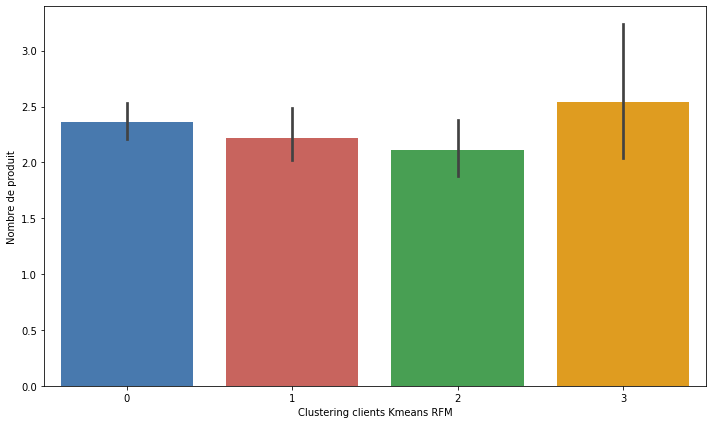

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = df_final_RFM["Clustering_Kmeans_RFM"], y = df_final_RFM["nb_of_product"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans RFM")
ax.set_ylabel('Nombre de produit')
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
#figure.savefig("Clustering KMeans_RFM nb-produits", dpi=400)
plt.tight_layout()

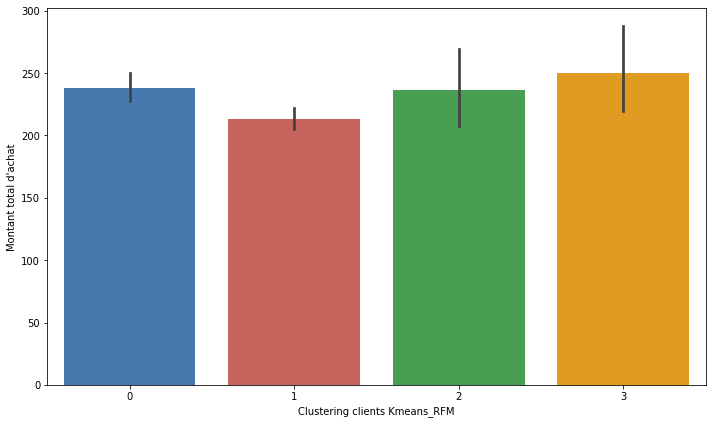

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = df_final_RFM["Clustering_Kmeans_RFM"], y = df_final_RFM["Tot_achats"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans_RFM")
ax.set_ylabel("Montant total d'achat")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
#figure.savefig("Clustering KMeans tot achat", dpi=400)
plt.tight_layout()

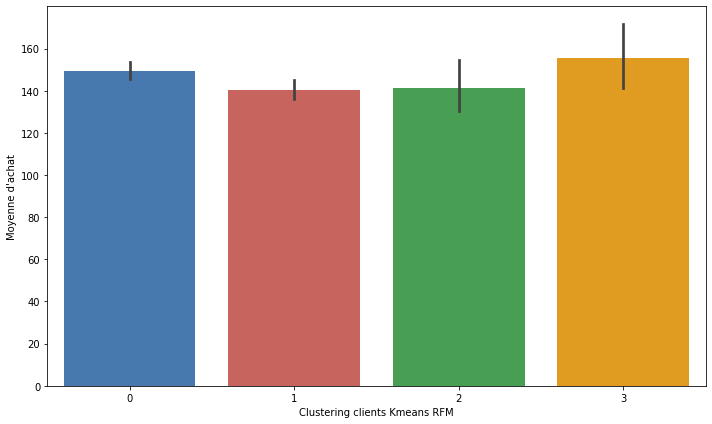

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = df_final_RFM["Clustering_Kmeans_RFM"], y = df_final_RFM["moy_achats"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans RFM")
ax.set_ylabel("Moyenne d'achat")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
#figure.savefig("Clustering KMeans moyenne achat", dpi=400)
plt.tight_layout()

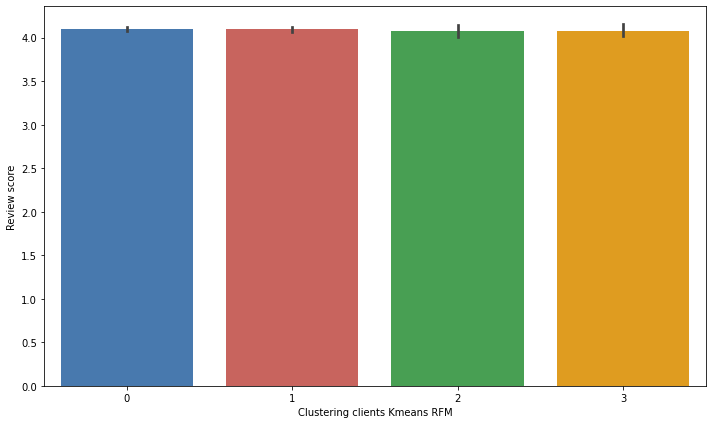

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = df_final_RFM["Clustering_Kmeans_RFM"], y = df_final_RFM["review_score_mean"].values, orient='v', palette = custom_palette)
ax.set_xlabel("Clustering clients Kmeans RFM")
ax.set_ylabel("Review score")
ax.set_xticklabels(ax.get_xticklabels())
figure = ax.get_figure()
#figure.savefig("Clustering KMeans score", dpi=400)
plt.tight_layout()

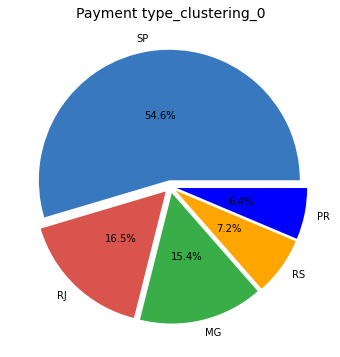

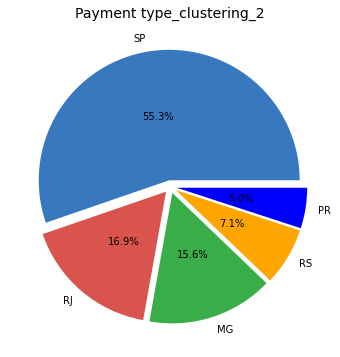

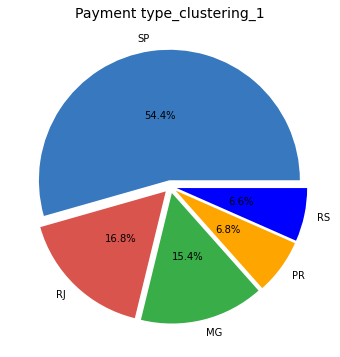

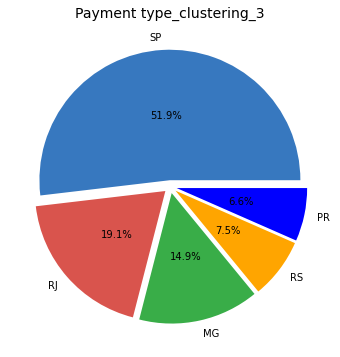

In [ ]:
for elm in df_final_RFM['Clustering_Kmeans_RFM'].unique():
    data = df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm]['customer_state'].value_counts().head(5)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm]['customer_state'].value_counts().head(5).index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title("Payment type_clustering_" + str(elm), fontsize=14);

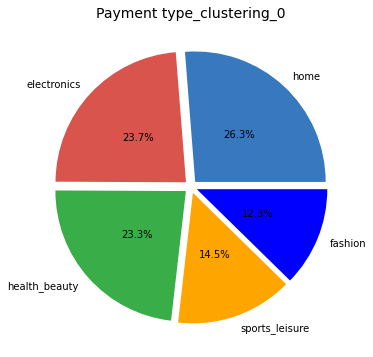

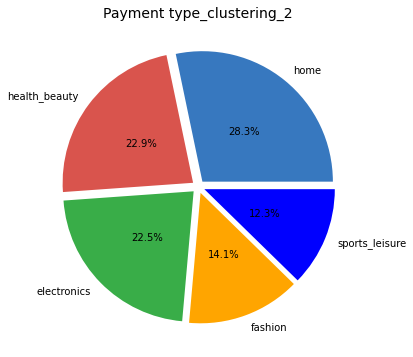

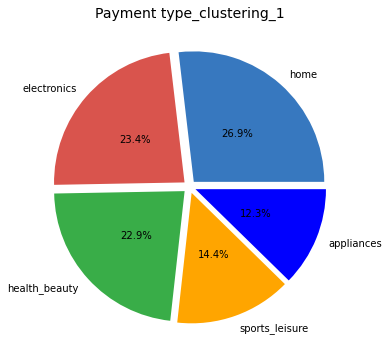

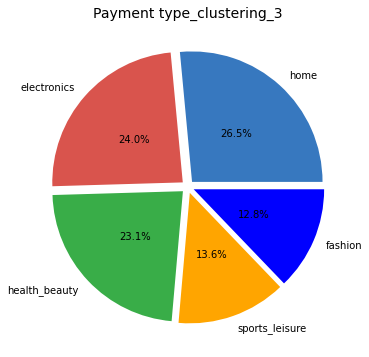

In [ ]:
for elm in df_final_RFM['Clustering_Kmeans_RFM'].unique():
    data = df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm]['Main_prod_category'].value_counts().head(5)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = df_final_RFM[df_final_RFM['Clustering_Kmeans_RFM'] == elm]['Main_prod_category'].value_counts().head(5).index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
    plt.title("Payment type_clustering_" + str(elm), fontsize=14);

D'une façon assez logique, une classification n'utilisant que le RFM est sensible au nombre de produits, au montant mais pas à la localisation, les review score ou la catégorie de produit préférée par cluster, ces informations n'étant pas prise en compte dans ce modèle.

Le modèle précédemment développé dans ce projet incluant le RFM avec ces autres informations est plus pertinent dans notre problématique